In [1]:
# https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
import sys
sys.path.insert(1, '../python_scripts/')
from wavenumbers import *
from plot import plot_wavenumber_cloud, plot_acquisition_layout

# Tests of the wavenumber formulae

Reference: [Geophysical Imaging lecture notes](https://www-ljk.imag.fr/membres/Ludovic.Metivier/LECTURE_NOTES/2020_COURS_MSIAM_FWI.pdf)

## 1 - Data

We will consider a mean frequency $f_0$ equal to $5$ Hz and we suppose that the velocity $c_0$ of the medium is equal to $2000$ m/s. A set of
$N_s = 51$ sources (resp. $N_r = 51$ receivers) have been regularly placed on the surface spanning a
range from $start = 0 km$ to $finish = 10 km$. The diffraction point $x = (5000, −3000)$ is situated
$5$ kms from start on the horizontal axis and $3$ kms deep in the subsurface.

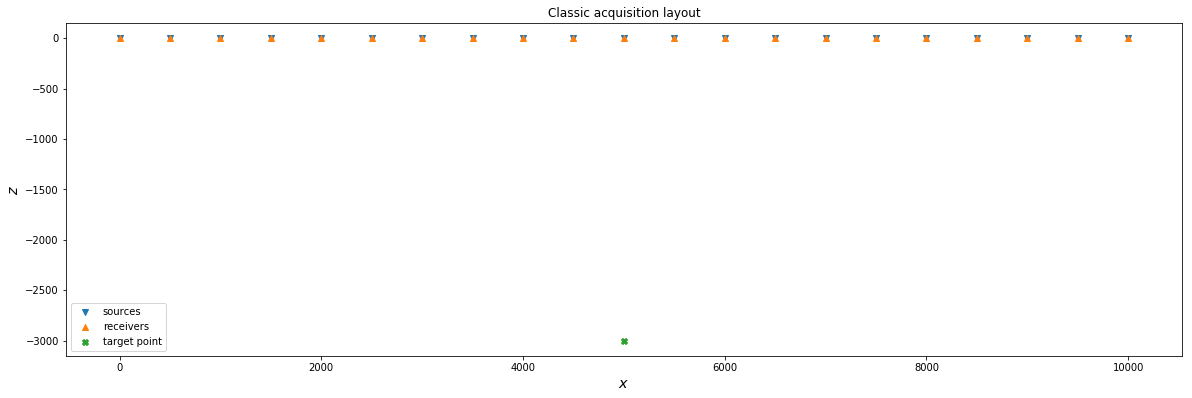

In [2]:
# Data
x = np.array([5000, -3000]) # difraction point
N = 21 # number of sources and receivers
c0 = 2000 # velocity of the medium
f0 = 10 # time frequency

# sources and receivers
start = 0
stop = 10000
# localizations of the sources
S = np.array([np.linspace(start = start, stop = stop, num = N, dtype = float), np.zeros(N)]).T 
# localizations of the receivers
R = np.array([np.linspace(start = start, stop = stop, num = N, dtype = float), np.zeros(N)]).T 

plot_acquisition_layout(S, R, x, title = "Classic acquisition layout")

## 2 - Incident and adjoint vectors formula

The positions formula corresponds to:

$$ k = k_0 ( p_s + p_r ) \, ,$$
with $p_s$ and $p_r$ respectively denoting the incident and adjoint vectors.

Suppose the diffraction point is $(x, y)$ (situated in the center of the surface) and let's denote $s$ and $r$ the positions of the source and the receiver respectively, both situated on the surface. The unit vectors $p_s$ and $p_r$ would be 

$$ p_s = \frac{x - s}{\| x - s \|} , \qquad  p_r = \frac{x - r}{\| x - r \|} \, .$$ 

The expression of the wavenumber $k$ is

$$ k = k_0 (p_s + p_r) \, .
$$

Below we will use the same layout as the example (regular positioning of the sources and receivers).

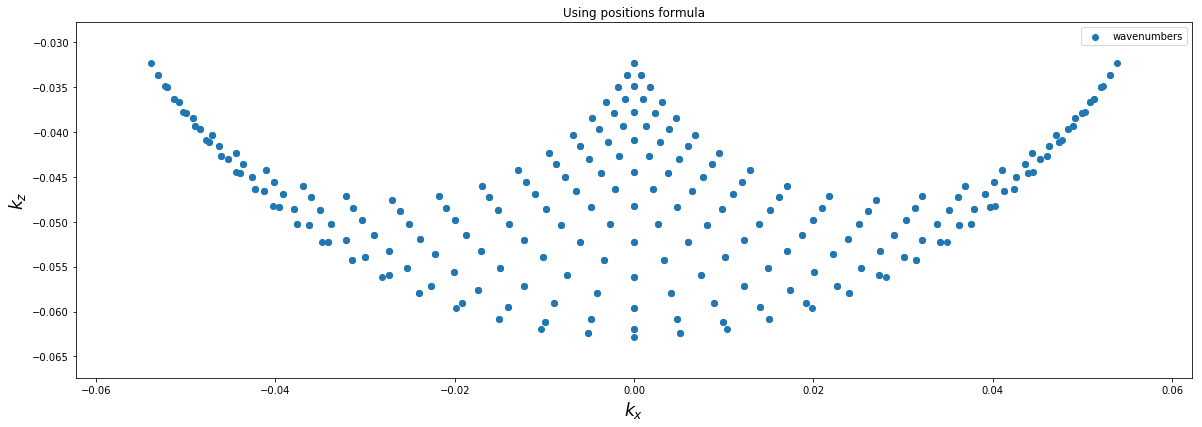

In [3]:
K_positions = wavenumbers_positions_formula(x, S, R, c0, f0)
plot_wavenumber_cloud(K_positions, labels = "wavenumbers", title = "Using positions formula")

## 3 - Angular formula

Using the angles $\phi_s$ and $\phi_r$ between the direction defined by $\begin{bmatrix} 0 \\ -1 \end{bmatrix}$ and the unit vectors $p_s$ and $p_r$ respectively, we find the cartesian coordinates of those vectors

$$ p_s = \begin{bmatrix} \sin \phi_s \\ - \cos \phi_s \end{bmatrix}, \qquad p_r = \begin{bmatrix} \sin \phi_r \\ - \cos \phi_r \end{bmatrix} \, .$$


From this we have

$$ k = k_0 ( p_s + p_r ) =  k_0 \begin{bmatrix} \sin \phi_s + \sin \phi_r \\ - \left( \cos \phi_s +  \cos \phi_r \right) \end{bmatrix} = k_0 \begin{bmatrix} 2 \cos( \frac{\phi_s - \phi_r}{2} ) \sin(\frac{\phi_s + \phi_r}{2}) \\ - 2 \cos( \frac{\phi_s - \phi_r}{2} ) \cos(\frac{\phi_s + \phi_r}{2}) \end{bmatrix} $$

and we finaly get a formula for the wavenumber defined by the angles $\phi_s$ and $\phi_r$:

$$ k = 2 k_0 \cos( \frac{\phi_s - \phi_r}{2} ) \begin{bmatrix} \sin(\frac{\phi_s + \phi_r}{2}) \\ - \cos(\frac{\phi_s + \phi_r}{2}) \end{bmatrix} .$$

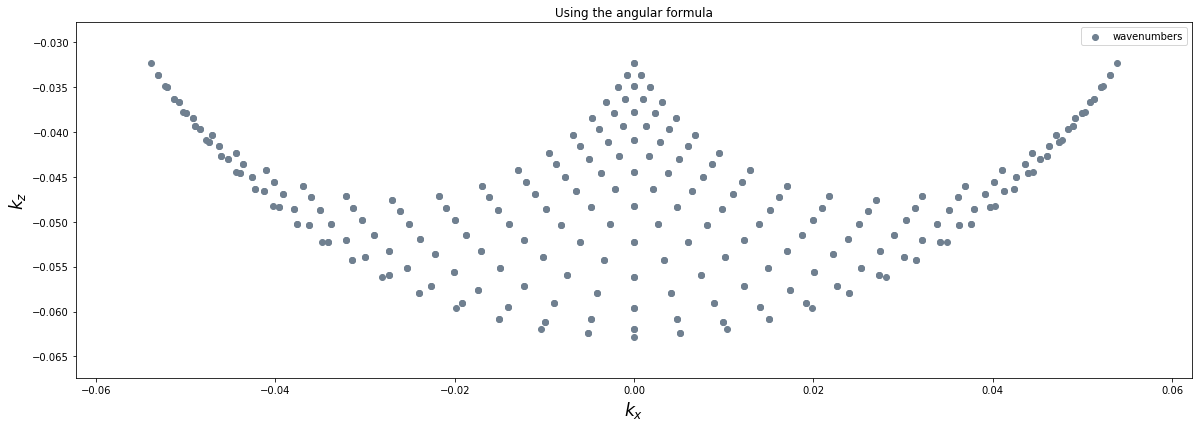

In [4]:
PhiS, PhiR = layout2angles(x, S, R)
K_angular = wavenumbers_angular_formula(PhiS, PhiR, c0, f0)
plot_wavenumber_cloud(K_angular, labels = "wavenumbers", colors = "slategrey", title = "Using the angular formula")

## Conclusion

To produce the following clouds we used both the positions formula and the angular formula and we can see that the two results are the same which means the formulae are equivalent.